## Way of doing a data science contest

### Anubhav Natani

#### Importing Libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import f1_score,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud, STOPWORDS
import re
from sklearn.cluster import KMeans
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

#### Reading the data

In [6]:
train_set = pd.read_csv('train_file.csv')
test_set = pd.read_csv('test_file.csv')

### Data Analysis

In [7]:
#making copy of original data
train_set_c = train_set.copy()
test_set_c = test_set.copy()

In [85]:
#getting insights from the data
train_set_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 12 columns):
ID                 31653 non-null int64
UsageClass         31653 non-null object
CheckoutType       31653 non-null object
CheckoutYear       31653 non-null int64
CheckoutMonth      31653 non-null int64
Checkouts          31653 non-null int64
Title              31653 non-null object
Creator            8516 non-null object
Subjects           29890 non-null object
Publisher          9737 non-null object
PublicationYear    9722 non-null object
MaterialType       31653 non-null object
dtypes: int64(4), object(8)
memory usage: 2.9+ MB


In [9]:
train_set_c.head()

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType
0,1,Physical,Horizon,2005,4,1,Tidal wave,NaN,"Tsunamis, Tsunamis Juvenile literature",NaN,NaN,BOOK
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",NaN,"Viking,",1998.,BOOK
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK
3,4,Physical,Horizon,2005,4,1,Annapolis,NaN,"War stories, Historical fiction, Domestic fict...",NaN,NaN,BOOK
4,5,Physical,Horizon,2005,4,1,As a man thinketh,NaN,Thought and thinking,NaN,NaN,BOOK


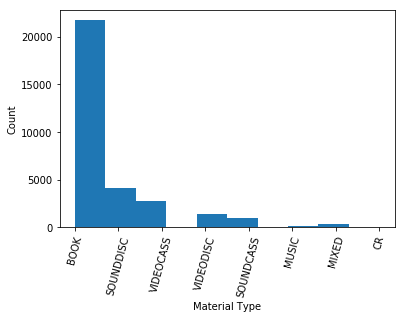

In [35]:
def plot_frequency(data):
    plt.hist([data["MaterialType"]])
    plt.xlabel("Material Type")
    plt.ylabel("Count")
    plt.xticks(rotation=75)
    plt.show()
plot_frequency(train_set_c)

In [25]:
#we have to remove the data which we do not need at all
#'UsageClass','CheckoutType','CheckoutYear','CheckoutMonth','Checkouts','PublicationYear','Publisher','Creator'
#this data does not impact the analysis so much 
#and also does not impact the results

In [21]:
#we have to also fill the null columns of data to make up for the null data
#or we can drop the null columns all much true data

In [20]:
#we can see that the data is bloted in the subject section we can clean the data and make improvements
#further we can cluster them to make good predictions

In [24]:
#making a functions to make up for the ideas till now

In [86]:
def comma_sep(string):
    string = str(string)
    result = string.split(',')[0]
    return result
def make_train_traditional(data):
    data = data.drop(['Title','ID','UsageClass','CheckoutType','CheckoutYear','CheckoutMonth','Checkouts','PublicationYear','Publisher','Creator'],axis=1)
    data["Subjects"] =  data["Subjects"].fillna("unknown")
    data["Subjects"] = data["Subjects"].apply(comma_sep)
    return data

In [87]:
new_train = make_train_traditional(train_set_c)

In [88]:
new_train.head()

,Subjects,MaterialType
0,Tsunamis,BOOK
1,unknown,BOOK
2,Cinco de Mayo Mexican holiday History Juvenile...,BOOK
3,War stories,BOOK
4,Thought and thinking,BOOK


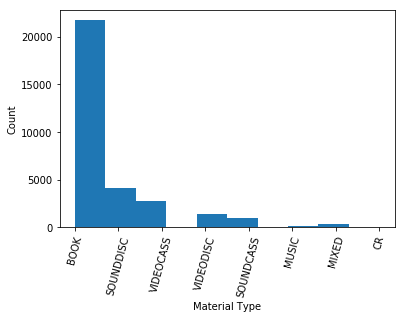

In [90]:
#seeing canges on the dataset frequency of material types
#it drops if we used dropna i changed code because we have less y available
plot_frequency(new_train)

In [91]:
#we can see that mixed material type is nearly gone from the dataset

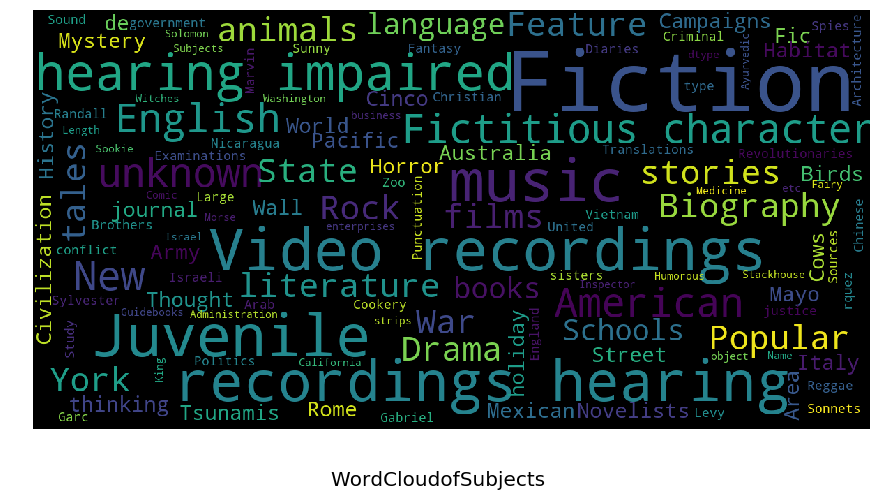

In [92]:
#making wordcloud of the subject data
stopwords = set(STOPWORDS)
def wordCloud(data,title=None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordCloud(new_train["Subjects"],"WordCloudofSubjects")

In [93]:
#to make clusters we have to do cleaning of the data
def cleaning(s):
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s
def data_clean(data,col_name):
    data[col_name] = data[col_name].apply(cleaning)
    return data

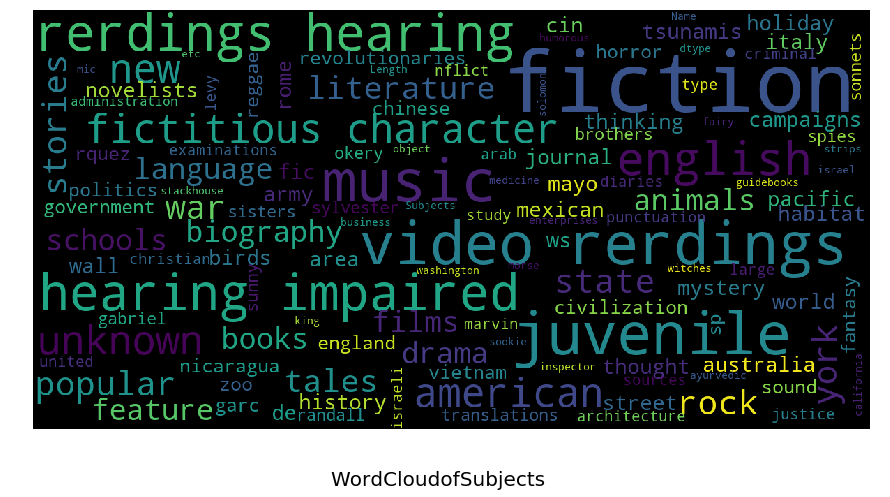

In [94]:
new_train = data_clean(new_train,"Subjects")
wordCloud(new_train["Subjects"],"WordCloudofSubjects")

In [97]:
#dividing data into cluster
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)
model = vectorizer.fit_transform(new_train['Subjects'].str.upper())
km = KMeans(n_clusters=6,init='k-means++',max_iter=200,n_init=1)
k=km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(6):
    print("cluster of words %d:" %i)
    #to print the first 10 words
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind])
    print()

cluster of words 0:
 stories
 love
 large
 type
 books
 rhyme
 detective
 mystery
 short
 legal

cluster of words 1:
 fantasy
 fiction
 american
 films
 canadian
 art
 games
 japan
 english
 poetry

cluster of words 2:
 music
 rock
 popular
 untry
 rap
 blues
 piano
 picture
 motion
 instrumental

cluster of words 3:
 unknown
 zyde
 giants
 gibson
 gideon
 gies
 gift
 gifted
 gifts
 gilbert

cluster of words 4:
 films
 rerdings
 video
 hearing
 impaired
 literature
 juvenile
 feature
 states
 united

cluster of words 5:
 fiction
 mystery
 juvenile
 science
 historical
 schools
 suspense
 animals
 humorous
 dogs



## Modelling 

In [52]:
#train data

In [98]:
train_data_X = new_train["Subjects"]
train_data_Y = new_train["MaterialType"]

In [99]:
#label encoding the y label
def encode(data):
    le = LabelEncoder()
    le.fit(train_set_c['MaterialType'])
    data = le.transform(data)
    return data

In [100]:
def decode(data):
    le = LabelEncoder()
    le.fit(train_set_c['MaterialType'])
    data = le.inverse_transform(data)
    return data

In [101]:
train_data_Y = encode(train_data_Y)

In [123]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(train_data_X)
train_word_features = word_vectorizer.transform(train_data_X)

In [103]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=10000)
char_vectorizer.fit(train_data_X)
train_char_features = char_vectorizer.transform(train_data_X)

In [104]:
#making sparce features for better prediction
train_features = hstack([train_char_features, train_word_features])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(train_features,train_data_Y,test_size=0.25,random_state=42)

In [127]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      6035
           1       0.10      0.38      0.16         8
           2       0.10      0.73      0.18        11
           3       0.36      0.72      0.48        18
           4       0.08      0.35      0.14        63
           5       0.85      0.91      0.88       971
           6       0.62      0.65      0.64       658
           7       0.27      0.61      0.37       150

   micro avg       0.85      0.85      0.85      7914
   macro avg       0.42      0.65      0.47      7914
weighted avg       0.90      0.85      0.87      7914



In [113]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
preds2=xgb.predict(X_test)
print(classification_report(preds2,y_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       257
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           4       0.10      1.00      0.18         1
           5       0.78      0.97      0.86        36
           6       0.65      0.55      0.59        20
           7       0.12      1.00      0.22         2

   micro avg       0.86      0.86      0.86       317
   macro avg       0.38      0.63      0.40       317
weighted avg       0.94      0.86      0.89       317



In [117]:
params = {
          "objective" : "multiclass",
          "num_class" : 8,
          "num_leaves" : 60,
          "max_depth": -1,
          "learning_rate" : 0.01,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1 }
train_data=lgb.Dataset(X_train,label=y_train)
lgbm=lgb.train(params, train_data,50)
preds=lgbm.predict(X_test)
y_pred = []
for ii in preds:
    y_pred.append(np.argmax(ii))
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       317
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

   micro avg       0.71      0.71      0.71       317
   macro avg       0.14      0.10      0.12       317
weighted avg       1.00      0.71      0.83       317



## Finally Prepration for Submission

In [129]:
new_test = make_train_traditional(test_set_c)
new_test = data_clean(new_test,"Subjects")
test_data_X = new_test["Subjects"]
test_word_features = word_vectorizer.transform(test_data_X)
test_char_features = char_vectorizer.transform(test_data_X)
test_features = hstack([test_char_features, test_word_features])
y_pred = classifier.predict(test_features)
y_pred = decode(y_pred)
new_df = pd.DataFrame({"ID":test_set_c["ID"],"MaterialType":y_pred})
new_df=new_df.set_index("ID")
new_df.to_csv("submission_Anubhav_1.csv")

c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\lightgbm\basic.py:478: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
